# NBA Game Prediction - Model Training

This notebook focuses on training and comparing multiple machine learning models. We'll:
1. Train multiple models (Logistic Regression, Random Forest, XGBoost)
2. Use cross-validation to evaluate model performance
3. Compare model performance using various metrics
4. Save the trained models

## 1. Import Libraries
Import all necessary libraries for model training and evaluation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set()
sns.set_palette('husl')

## 2. Load Processed Data
Load the processed data from the feature selection step.

In [2]:
# Load the processed data
X_train = pd.read_csv('../data/processed/X_train_selected.csv')
X_test = pd.read_csv('../data/processed/X_test_selected.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (1912, 5)
Testing set shape: (479, 5)


## 3. Define Models
Initialize multiple models for comparison.

In [3]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Initialize cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## 4. Cross-Validation
Evaluate models using cross-validation.

Logistic Regression - Mean CV Accuracy: 0.783 (+/- 0.058)
Random Forest - Mean CV Accuracy: 0.768 (+/- 0.059)
XGBoost - Mean CV Accuracy: 0.742 (+/- 0.046)


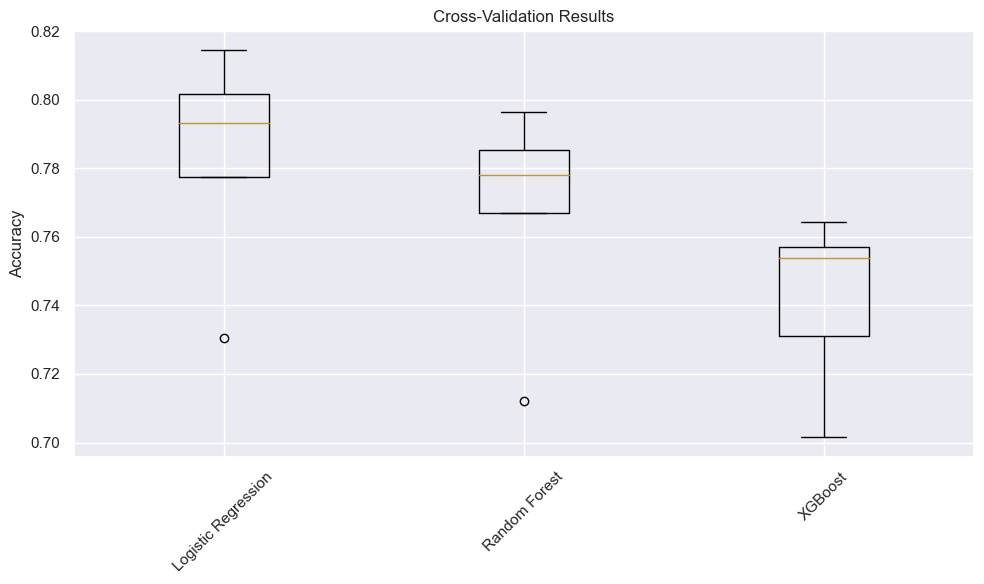

In [4]:
# Perform cross-validation for each model
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(
        model, X_train, y_train['TARGET'],
        cv=cv, scoring='accuracy'
    )
    cv_results[name] = scores
    print(f'{name} - Mean CV Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

# Plot CV results
plt.figure(figsize=(10, 6))
plt.boxplot([scores for scores in cv_results.values()],
           labels=list(cv_results.keys()))
plt.title('Cross-Validation Results')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Model Training and Evaluation
Train models on the full training set and evaluate on the test set.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       243
           1       0.80      0.76      0.78       236

    accuracy                           0.79       479
   macro avg       0.79      0.79      0.79       479
weighted avg       0.79      0.79      0.79       479



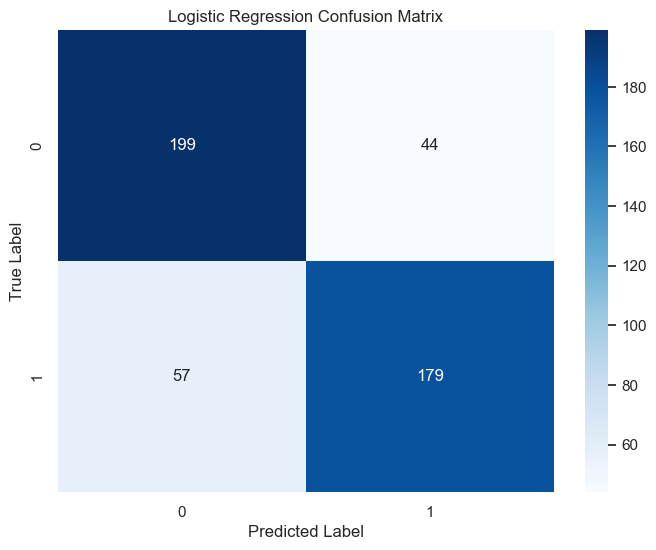


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       243
           1       0.79      0.72      0.75       236

    accuracy                           0.76       479
   macro avg       0.77      0.76      0.76       479
weighted avg       0.77      0.76      0.76       479



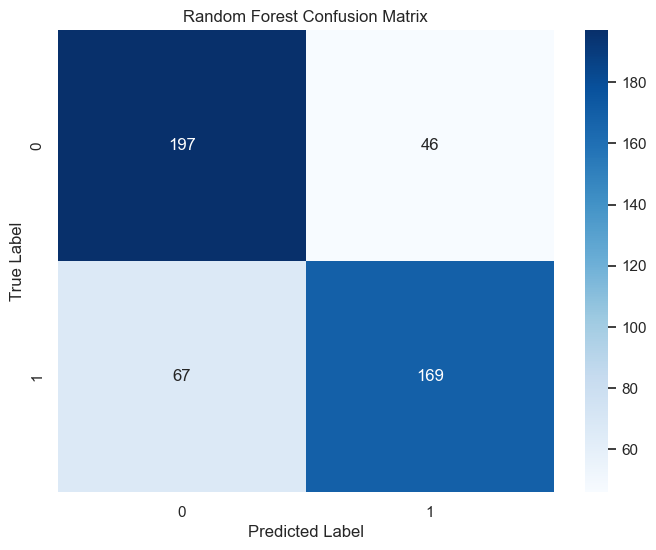


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       243
           1       0.73      0.71      0.72       236

    accuracy                           0.73       479
   macro avg       0.73      0.73      0.73       479
weighted avg       0.73      0.73      0.73       479



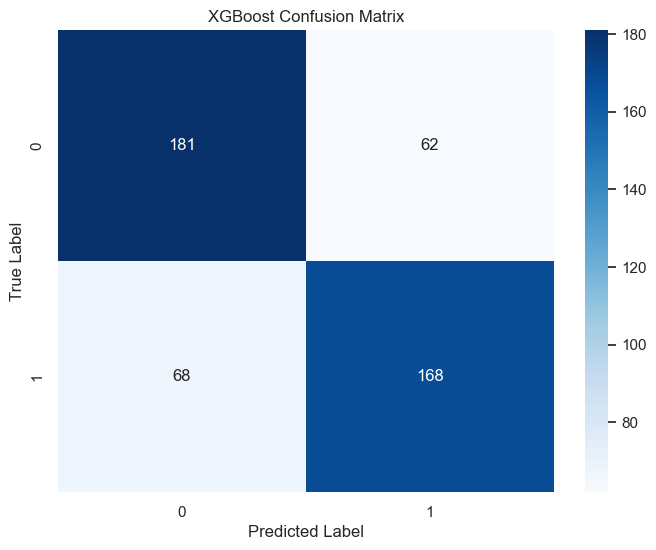

In [5]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train['TARGET'])
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results[name] = {
        'accuracy': accuracy_score(y_test['TARGET'], y_pred),
        'precision': precision_score(y_test['TARGET'], y_pred),
        'recall': recall_score(y_test['TARGET'], y_pred),
        'f1': f1_score(y_test['TARGET'], y_pred),
        'roc_auc': roc_auc_score(y_test['TARGET'], y_pred_proba)
    }
    
    # Print classification report
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test['TARGET'], y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test['TARGET'], y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

## 6. Compare Model Performance
Compare the performance of all models using various metrics.


Model Performance Comparison:
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.789144   0.802691  0.758475  0.779956  0.865523
Random Forest        0.764092   0.786047  0.716102  0.749446  0.842880
XGBoost              0.728601   0.730435  0.711864  0.721030  0.837222


<Figure size 1200x600 with 0 Axes>

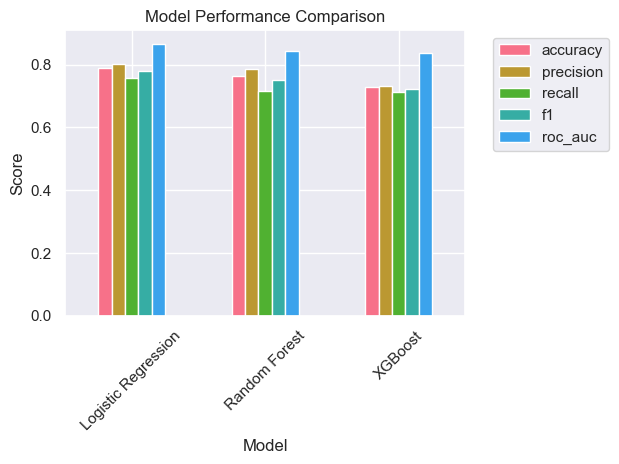

In [6]:
# Create comparison DataFrame
comparison = pd.DataFrame(results).T
print('\nModel Performance Comparison:')
print(comparison)

# Plot comparison
plt.figure(figsize=(12, 6))
comparison.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 7. Save Best Model
Save the best performing model for future use.

In [7]:
# Find best model based on ROC AUC
best_model_name = comparison['roc_auc'].idxmax()
best_model = models[best_model_name]

# Save best model
joblib.dump(best_model, f'../models/best_model.joblib')

print(f'\nBest model ({best_model_name}) saved to ../models/')


Best model (Logistic Regression) saved to ../models/
